<blockquote>
    
<b>Илья, привет!</b>
    
    
Меня зовут Макаев Андрей, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты" Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница

Можешь офрмлять их так:

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
 </div>
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>
В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

</blockquote>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.
Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
1. сalls — количество звонков,
2. minutes — суммарная длительность звонков в минутах,
3. messages — количество sms-сообщений,
4. mb_used — израсходованный интернет-трафик в Мб,
5. is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Хорошее введение, стоит добавить также описание признаков.

<div class="alert alert-info"> <b>Комментарий студента: Добавил описание признаков</b> 
    
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

## Откройте и изучите файл

Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')

'Первые строчки:'

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


'Последние строчки:'

,calls,minutes,messages,mb_used,is_ultra
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0
3213,80.0,566.09,6.0,29480.52,1


'Случайные строчки:'

,calls,minutes,messages,mb_used,is_ultra
3138,48.0,324.37,51.0,12445.61,0
2933,68.0,433.76,37.0,22221.63,1
1448,0.0,0.00,7.0,39419.77,1
100,3.0,40.24,0.0,1392.19,0
2466,60.0,408.49,0.0,22010.12,0


'Информация о каждом столбце:'

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


'Общая информация:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


'Явные дубликаты:'

0

'Сортировка и количество пропущенных значений:'

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

'Гистограмма:'

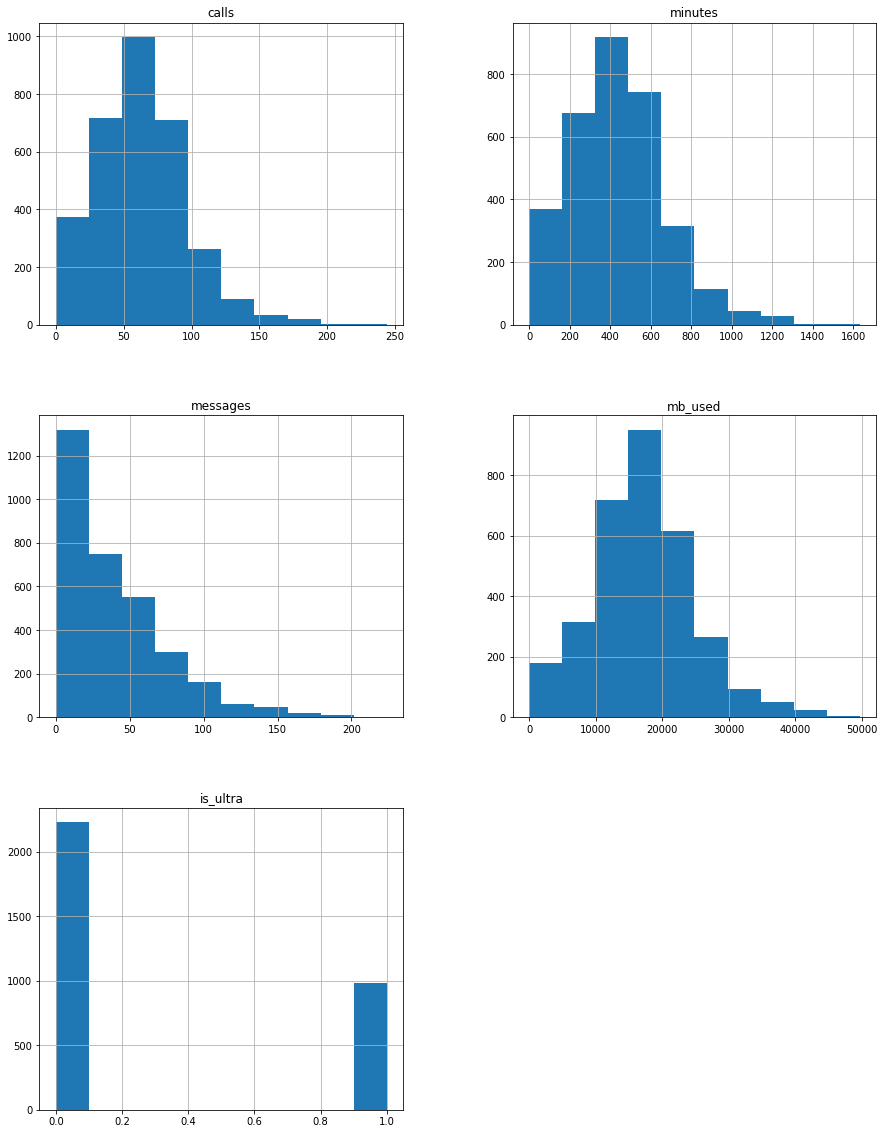

In [3]:
def analyze_dataframe(df):
    display("Первые строчки:", df.head())
    display("Последние строчки:", df.tail())
    display("Случайные строчки:", df.sample(5))
    display("Информация о каждом столбце:", df.describe())
    display("Общая информация:")
    df.info()
    display("Явные дубликаты:", df.duplicated().sum())
    display("Сортировка и количество пропущенных значений:", df.isnull().sum().sort_values())
    display("Гистограмма:")
    df.hist(figsize=(15, 20))
    plt.show()
analyze_dataframe(data)


Посмотрим также на выбрсы 


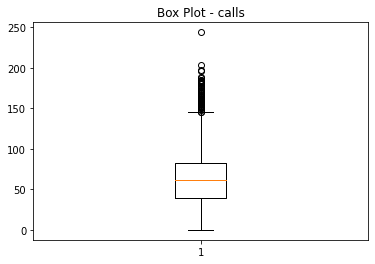

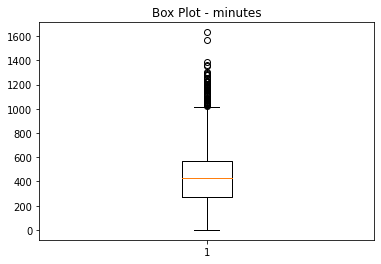

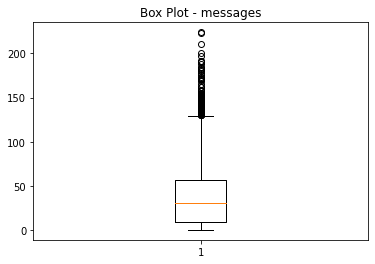

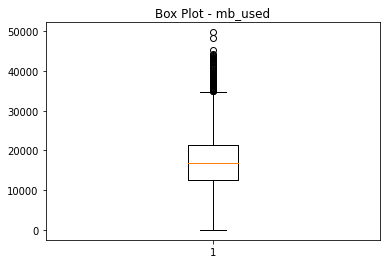

In [4]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['calls'])
plt.title('Box Plot - calls')
plt.show()
plt.figure(figsize=(6, 4))
plt.boxplot(data['minutes'])
plt.title('Box Plot - minutes')
plt.show()
plt.figure(figsize=(6, 4))
plt.boxplot(data['messages'])
plt.title('Box Plot - messages')
plt.show()
plt.figure(figsize=(6, 4))
plt.boxplot(data['mb_used'])
plt.title('Box Plot - mb_used')
plt.show()

In [5]:
display("Соотношение тарифов:")
display(data['is_ultra'].value_counts(True))

'Соотношение тарифов:'

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Выводы:
1. Последовательность столбцов логична
2. Явных дубликатов - нет
3. Распределение данных в столбцах - нормальное. Сообщения сейчас используются редко
4. Пропусков - нет
5. Выбросы есть, но такие клиенты реальны, поэтому удаление выбросов пагубно скажется предсказательной возможности модели.
6. Примерно 69.4% пользователей используют тариф "Smart", в то время как около 30.6% пользователей используют тариф "Ultra".
7. Соотношение тарифов не является равномерным, и тариф "Smart" является более популярным среди пользователей.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Данные прочитаны, предварительный осмотр проведен. Тут также можно обратить внимание на насколько сбалансированы данные - какое соотношение тарифов. Это также можно сделать с помощью метода .value_counts(True)

<div class="alert alert-info"> <b>Комментарий студента: Добавил вычисление сбалансированности данных и вывод на счёт этого</b> 
    
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

## Разбейте данные на выборки

Разделяем исходные данные на обучающую выборку и временную выборку в соотношении 60:40. Затем мы разделяем временную выборку на валидационную и тестовую выборки в соотношении 50:50.

In [6]:
train_data, temp_data = train_test_split(data, test_size=0.4, random_state=12345, stratify=data['is_ultra'])
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=12345, stratify=temp_data['is_ultra'])

train_features = train_data.drop('is_ultra', axis=1)
train_target = train_data['is_ultra']

val_features = val_data.drop('is_ultra', axis=1)
val_target = val_data['is_ultra']

test_features = test_data.drop('is_ultra', axis=1)
test_target = test_data['is_ultra']

display("Размер обучающей выборки:", train_data.shape)
display("Размер валидационной выборки:", val_data.shape)
display("Размер тестовой выборки:", test_data.shape)

'Размер обучающей выборки:'

(1928, 5)

'Размер валидационной выборки:'

(643, 5)

'Размер тестовой выборки:'

(643, 5)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Здорово, что проверил правильность разбиения.
    
Также лучше указывать параметр stratify, так у тебя будет одинаковое соотношение классов в каждой выборке. Передавать этому параметру надо признак таргета.

<div class="alert alert-info"> <b>Комментарий студента: Добавил параметр stratify</b> 
    
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

## Исследуйте модели

Для исследования моделей буду использовать методы: RandomForestClassifier, LogisticRegression и DecisionTreeClassifier, также различные гиперпараметры.

In [7]:
# Случайный лес
best_accuracy_rf = 0
best_params_rf = {}
for n_estimators in range(1,40):
    for max_depth in range(5,20):
        model_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,random_state=12345)
        model_rf.fit(train_features, train_target)
        predictions_rf = model_rf.predict(val_features)
        accuracy_rf = accuracy_score(val_target, predictions_rf)
        print('Количество деревьев:', n_estimators, 'Глубина дерева:', max_depth, 'Точность:', accuracy_rf)
        if accuracy_rf > best_accuracy_rf:
            best_accuracy_rf = accuracy_rf
            best_params_rf = {
                'n_estimators': n_estimators,
                'max_depth': max_depth
            }

print('Лучшие гиперпараметры для Случайного леса:', best_params_rf)
print('Лучшая точность:', best_accuracy_rf)
print()



Количество деревьев: 1 Глубина дерева: 5 Точность: 0.7713841368584758
Количество деревьев: 1 Глубина дерева: 6 Точность: 0.7791601866251944
Количество деревьев: 1 Глубина дерева: 7 Точность: 0.7433903576982893
Количество деревьев: 1 Глубина дерева: 8 Точность: 0.776049766718507
Количество деревьев: 1 Глубина дерева: 9 Точность: 0.7573872472783826
Количество деревьев: 1 Глубина дерева: 10 Точность: 0.76049766718507
Количество деревьев: 1 Глубина дерева: 11 Точность: 0.7558320373250389
Количество деревьев: 1 Глубина дерева: 12 Точность: 0.744945567651633
Количество деревьев: 1 Глубина дерева: 13 Точность: 0.7682737169517885
Количество деревьев: 1 Глубина дерева: 14 Точность: 0.7667185069984448
Количество деревьев: 1 Глубина дерева: 15 Точность: 0.7542768273716952
Количество деревьев: 1 Глубина дерева: 16 Точность: 0.7247278382581649
Количество деревьев: 1 Глубина дерева: 17 Точность: 0.7262830482115086
Количество деревьев: 1 Глубина дерева: 18 Точность: 0.7122861586314152
Количество дере

In [8]:
# Логистическая регрессия
best_accuracy_lr = 0
best_params_lr = {}

for C in np.arange(0.01, 1.0, 0.01):
    model_lr = LogisticRegression(C=C, random_state=12345)
    model_lr.fit(train_features, train_target)
    predictions_lr = model_lr.predict(val_features)
    accuracy_lr = accuracy_score(val_target, predictions_lr)

    if accuracy_lr > best_accuracy_lr:
        best_accuracy_lr = accuracy_lr
        best_params_lr = {'C': C}

    print('Гиперпараметры:', {'C': C})
    print('Точность:', accuracy_lr)
    print()

print('Лучшие гиперпараметры для Логистической регрессии:', best_params_lr)
print('Лучшая точность:', best_accuracy_lr)
print()


Гиперпараметры: {'C': 0.01}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.02}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.03}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.04}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.05}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.060000000000000005}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.06999999999999999}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.08}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.09}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.09999999999999999}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.11}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.12}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.13}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.14}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.15000000000000002}
Точность: 0.7387247278382582

Гиперпараметры: {'C': 0.16}
Точность: 0.7387247278382582

Гиперпараме

In [9]:

# Дерево решений
best_accuracy_dt = 0
best_params_dt = {}

for max_depth in range(5,20):
    for min_samples_split in range(2,10):
        for min_samples_leaf in range(1,10):
            for criterion in ['gini', 'entropy']:
                model_dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,
                                                  min_samples_leaf=min_samples_leaf, criterion=criterion,
                                                  random_state=12345)
                model_dt.fit(train_features, train_target)
                predictions_dt = model_dt.predict(val_features)
                accuracy_dt = accuracy_score(val_target, predictions_dt)

                if accuracy_dt > best_accuracy_dt:
                    best_accuracy_dt = accuracy_dt
                    best_params_dt = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'criterion': criterion
                    }

                print('Гиперпараметры:', {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'criterion': criterion
                })
                print('Точность:', accuracy_dt)
                print()

print('Лучшие гиперпараметры для Дерева решений:', best_params_dt)
print('Лучшая точность:', best_accuracy_dt)

Гиперпараметры: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
Точность: 0.7853810264385692

Гиперпараметры: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}
Точность: 0.7822706065318819

Гиперпараметры: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'gini'}
Точность: 0.7853810264385692

Гиперпараметры: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'entropy'}
Точность: 0.7822706065318819

Гиперпараметры: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3, 'criterion': 'gini'}
Точность: 0.7853810264385692

Гиперпараметры: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3, 'criterion': 'entropy'}
Точность: 0.7838258164852255

Гиперпараметры: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4, 'criterion': 'gini'}
Точность: 0.7853810264385692

Гиперпараметры: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf

Выводы:
Лучше всего себя показала модель Случайный лес со следующими параметрами: n_estimators: 39, max_depth: 9 точность: 0.8227060653188181

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Некоторые замечания и рекомендации💡:</b>
    
Отличное исследование, обучено 3 модели с различными значениями гиперпараметров для этих моделей.
    
Только лучше использовать циклы, гиперпараметров ты можешь перебирать много, и всё задавать вручную будет не рационально. В цикле же тоже задать нужные гиперпараметры, записывать метрики при заданных гиперпараметрах и анализировать обучение моделей.

<div class="alert alert-info"> <b>Комментарий студента: Действительно, через циклы попроще будет, так прослеживается какие и как гиперпараметры влияют на точность модели в конкретной задаче. После перебирания гиперпараметров в цикле нашлась новая лучшая модель! отредактировал вывод.</b> 
    
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

# Проверьте модель на тестовой выборке

In [10]:
model = RandomForestClassifier(n_estimators=39, max_depth=9, random_state=12345)
model.fit(train_features, train_target) 
predictions = model.predict(test_features)
result = accuracy_score(test_target, predictions)

print("Accuracy на тестовой выборке:", result)

Accuracy на тестовой выборке: 0.8118195956454122


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b>

## (бонус) Проверьте модели на адекватность

Для проверки модели на адекватность используем простую константную модель, которая всегда предсказывает тариф Смарт.

In [11]:
dummy = DummyClassifier(strategy='most_frequent').fit(train_features, train_target)
dummy_pred = dummy.predict(test_features)

print('Accuracy dummy-модели: ', accuracy_score(test_target, dummy_pred))

Accuracy dummy-модели:  0.6936236391912908


Проверка на адекватность пройдена успешно, точность нашей модели: 0.8118195956454122, что больше точности - 0.6936236391912908 простой константной модели.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Некоторые замечания и рекомендации💡:</b>
    
Это бонусное задание, оно необязательно, поэтому комментарий желтый=) MSE - неподходящая метрика, она используется для задач регрессии, для классификации же она не подходит.
    
В этом задании можно  воспользоваться такими размышлениями - простая константная модель, которая всегда предсказывает тариф Смарт, будет иметь accuracy 0.69 (таково соотношение тарифов в выборке). Твои модели имеют качество выше - соотвественно они уже неплохо работают.

<div class="alert alert-info"> <b>Комментарий студента: Изменил проверку на адекватность.</b> 
    
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


## Вывод

В ходе проекта была созда модель на основе RandomForestClassifier с гиперпараметрами: n_estimators: 39; max_depth: 9, которая показала accuracy: 0.8227060653188181 на тренировочной и accuracy: 0.8118195956454122 на тестовой выборке.

Проверка на адекватность пройдена успешно, точность нашей модели: 0.8118195956454122, что больше точности - 0.6936236391912908 простой константной модели.

<blockquote>

**Общий вывод по проекту**

Спасибо за твой проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец! Есть несколько важных моментов, которые я отметил и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях.

**Отмечу отдельные положительные моменты проекта**:

* Аккуратный код, качественное оформление
* Подробно исследовал данные
* Обучение различных моделей, подбор лучших гиперпараметров

Критичных замечаний нет.
    
Если есть вопросы, я готов на них ответить при повторном ревью.
    
Для более близкого знакомства с машинным обучением могу посоветовать учебник от яндекса https://academy.yandex.ru/handbook/ml/article/kross-validaciya - тут в начале главы также описывается зачем нужны валидация и тест.
    
**Желаю удачи и жду твой проект на повторное ревью!**
</blockquote>

<div class="alert alert-info"> <b>Комментарий студента: Спасибо за ревью и дополнительный материал!</b> 
    
 </div>

<blockquote>

**Общий вывод по проекту-2**

Проект принят

**Успехов в дальнейшем обучении, у тебя всё получится!**